## CASE STUDY

 ## Confidence Interval and CLT

# About the Company:

Company Y is a global retail corporation with an extensive network of supercenters, discount stores, and grocery outlets. With a customer base exceeding 100 million worldwide, the company strives to enhance its business strategies by leveraging customer data.

# Business Problem:

The management team at Company Y seeks to analyze customer purchase behavior, particularly the purchase amounts in relation to factors like customer gender, age, and other demographic characteristics. A key focus is to determine whether spending habits differ between male and female customers, especially during peak shopping periods like Black Friday.

The objective is to understand if women spend more than men during Black Friday and how this insight, along with other demographic factors, can help the company make informed business decisions.

# Dataset:

The dataset comprises transactional data from Black Friday purchases, containing the following features:

* User_ID: Customer identifier
* Product_ID: Product identifier
* Gender: Customer gender
* Age: Age categorized into bins
* Occupation: Customer’s occupation (anonymized)
* City_Category: City classification (A, B, C)
* StayInCurrentCityYears: Duration of stay in the current city
* Marital_Status: Marital status
* ProductCategory: Product category (anonymized)
* Purchase: Purchase amount during Black Friday

# Analysis Approach:

1) Data Exploration & Cleaning:

* Perform initial checks on the dataset’s structure, detect and handle null values, and identify outliers using boxplots and statistical summaries.
* Explore spending patterns across male and female customers, tracking the average spending for both genders.

2) Statistical Analysis:

* Confidence Interval Analysis: Use the Central Limit Theorem to calculate confidence intervals for the average spending of male and female customers, determining if significant differences exist.
* Comparison Across Other Factors: Extend the analysis to compare spending behavior between married and unmarried customers, as well as across different age groups.

3) Business Insights:

* Assess whether the confidence intervals for male and female spending overlap, and interpret how Company Y can leverage these insights to improve marketing and promotional strategies.
* Provide recommendations for tailoring promotions based on gender, marital status, and age group, aiming to optimize revenue during key shopping events like Black Friday.

## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv('datawm.txt')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## Data set:
The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:
- User_ID:	User ID
- Product_ID:	Product ID
- Gender:	Sex of User
- Age:	Age in bins
- Occupation:	Occupation(Masked)
- City_Category:	Category of the City (A,B,C)
- StayInCurrentCityYears:	Number of years stay in current city
- Marital_Status:	Marital Status
- ProductCategory:	Product Category (Masked)
- Purchase:	Purchase Amount

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


# Observations:

* With the above data, it seems cleaned and having total records of 550068 records
* No null value is there
* Data types available are object and int

In [8]:
for i in df.columns[:-1]:
    df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


- to ease out the data types we converted the categorical columns as catgory data type

In [9]:
a = df.describe(include = 'category')
a

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


In [10]:
share_to_total = a.loc['freq']/a.loc['count']*100
share_to_total

User_ID                        0.186522
Product_ID                     0.341776
Gender                        75.310507
Age                           39.919974
Occupation                    13.145284
City_Category                 42.026259
Stay_In_Current_City_Years    35.235825
Marital_Status                59.034701
Product_Category              27.438971
dtype: object

# Observation
    - User ID : we are having the 5891 unique users, who are repeating the purchases
    - Product ID : in sales its showing we have sold 3631 unique products to the customers and product_id "P00265242" being most facoured product which is sold 1880 times
    - Gender : Max purchase reported by males i.e. almost 414259 tickets generated for males, i.e, 75% of total purchase
    - Age : 26-35 age bracket is the one who is reporting max number of sales, out of availabe total sales, i.e., almost 40% of the total sales
    - Stay_in_Curr_City_Years : Max purchase is reported by the people who are staying for 1 years, i.e, 40%
    - Porduct category : Product catgeory 5 is most frequestly brought products almost 27% of sales are coming from that category

In [11]:
# Statistcs of numerical columns
df.describe().round()

,Purchase
count,550068.0
mean,9264.0
std,5023.0
min,12.0
25%,5823.0
50%,8047.0
75%,12054.0
max,23961.0


## Observation
    - Reported avrg purcahse of population around Rs. 9264 with the std deviation of Rs. 5023.
    - Min ticket value was Rs. 12 while max ticket size was Rs. 23961
    - 50 percentile or the median value for the purchase are highlighting around Rs.8047, which is lower than mean value
    - Median < Mean pointing that there are some products which are high valued are purchased

In [12]:
# No null values seen in the df
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [13]:
for i in df.columns:
    print (f"column {i} has unique values as {df[i].unique()}")
    print('='*100)

column User_ID has unique values as [1000001, 1000002, 1000003, 1000004, 1000005, ..., 1004588, 1004871, 1004113, 1005391, 1001529]
Length: 5891
Categories (5891, int64): [1000001, 1000002, 1000003, 1000004, ..., 1006037, 1006038, 1006039, 1006040]
column Product_ID has unique values as ['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
Length: 3631
Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642', 'P0099742', 'P0099842', 'P0099942']
column Gender has unique values as ['F', 'M']
Categories (2, object): ['F', 'M']
column Age has unique values as ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
column Occupation has unique values as [10, 16, 15, 7, 20, ..., 18, 5, 14, 13, 6]
Length: 21
Categories (21, int64): [0, 1, 2, 3, ..., 17, 18, 19, 20]
column City_Category

## Observation: 
* While checking the data sanity we observe that there are no abnormal values that are highlighted.
* Gender column has 2 unique values as M and F which we can change to 0 and 1 for convinience in analysis
* Age has 7 age buckets ranging from '0-17' to '55+'
* Occupation has various categories ranging from 0 to 20
* City we have categoriesed under the 3 classes that are 'A', 'B' and 'C'
* Stay in current city has the people who are staying in the years in the range of 0 years to 4+ years

## Univariate Analysis

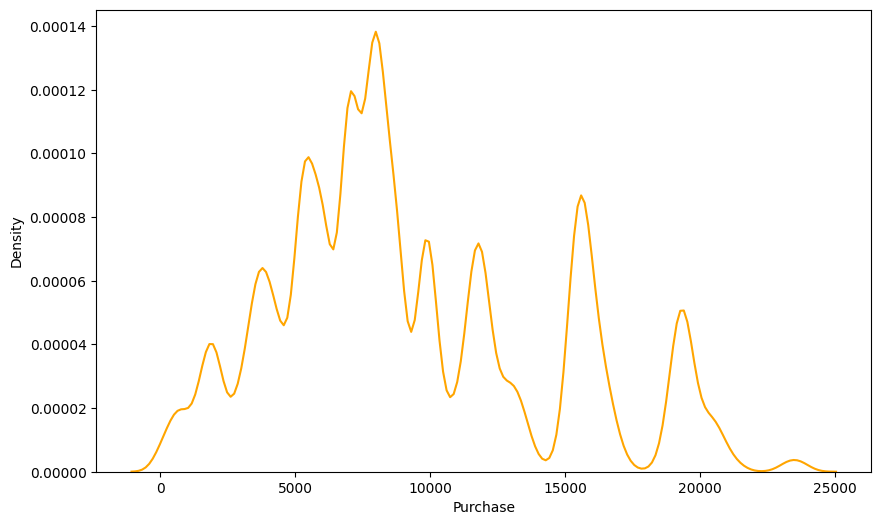

In [15]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Purchase', color= 'orange')
plt.show()

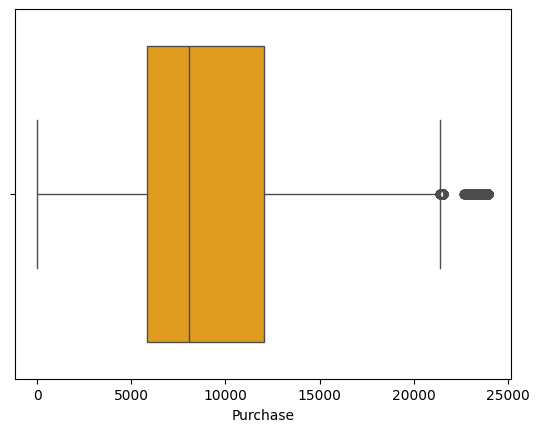

In [16]:
sns.boxplot(data=df, x='Purchase', color= 'orange')
plt.show()

> The probability distributions and the box plot both are highlighting that there are ouliers existing

> Lets see the other columns and their spread across the df

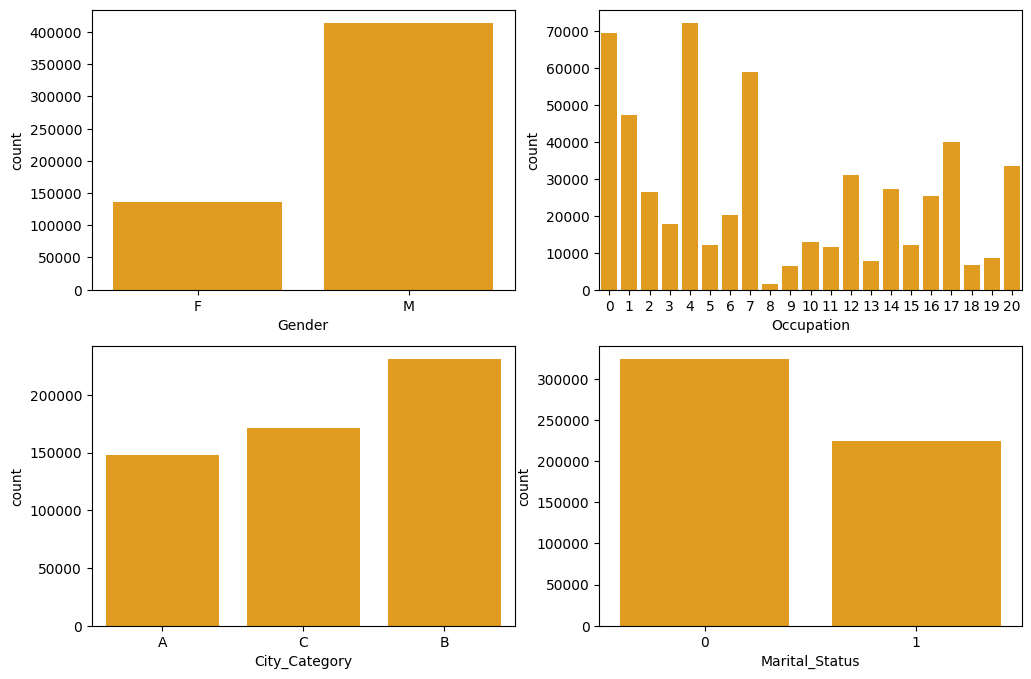

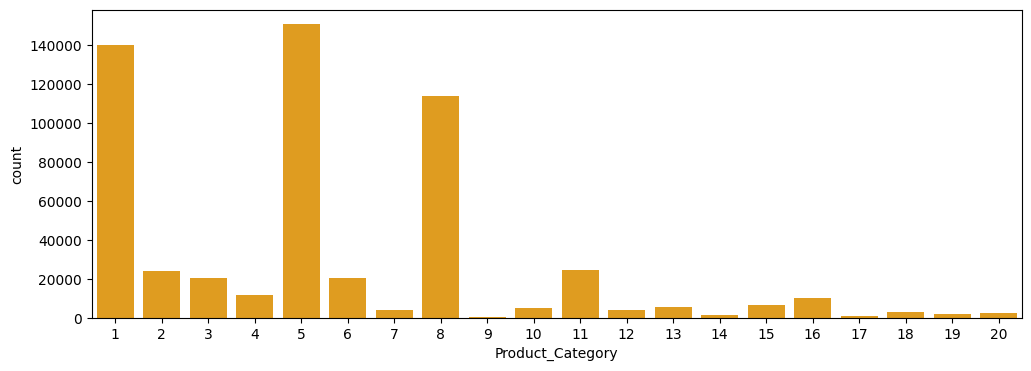

In [8]:
categorical_cols = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.countplot(data=df, x='Gender', ax=axs[0,0], color= 'orange')
sns.countplot(data=df, x='Occupation', ax=axs[0,1], color= 'orange')
sns.countplot(data=df, x='City_Category', ax=axs[1,0], color = 'orange')
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1], color= 'orange')
plt.show()

plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='Product_Category', color= 'orange')
plt.show()

# Observation: 
* Most of the orders are placed by the males
* Occupation category having higher sales are Cat_4 > cat_0 > Cat_7 while lowest sales reported by Cat_8
* City B has recorded highest sales followed by city C and A
* Unmarried people are purchasing more than married ones
* Product Cateogories 5, 1 and 8 are among top 3 poular categories.

<Figure size 1200x800 with 0 Axes>

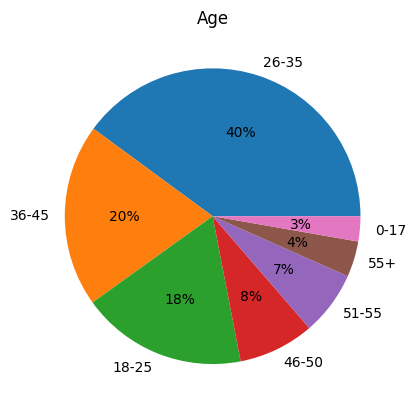

In [21]:
#  Check the spread of age in total samples (Category wise share)

plt.figure(figsize=(12, 8))
data = df['Age'].value_counts(normalize=True) * 100
fig, axs = plt.subplots(1, 1)
axs.pie(x=data.values, labels=data.index, autopct='%.0f%%')
axs.set_title("Age")
plt.show()

## Observation:

> Age category of 26-35 contributes t0 40% of samples, 26 to 45 by 20% while 18 to 25 contributes by 18%, so almost 80% of samples are 18 to 45 year range that we are catering

<Figure size 1200x800 with 0 Axes>

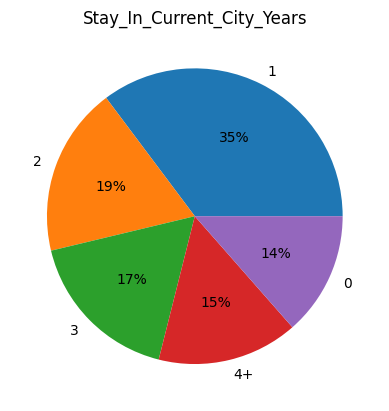

In [146]:
# Same we can check for the yearwise share for stay in city

plt.figure(figsize=(12, 8))
data = df['Stay_In_Current_City_Years'].value_counts(normalize=True) * 100
fig, axs = plt.subplots(1, 1)
axs.pie(x=data.values, labels=data.index, autopct='%.0f%%')
axs.set_title("Stay_In_Current_City_Years")
plt.show()

# Observation: 

> Major selling of the products is contributed by the people who are living less that or equal to year as they just moved to city ans they purchased requirments from market

## Bivariate Analysis

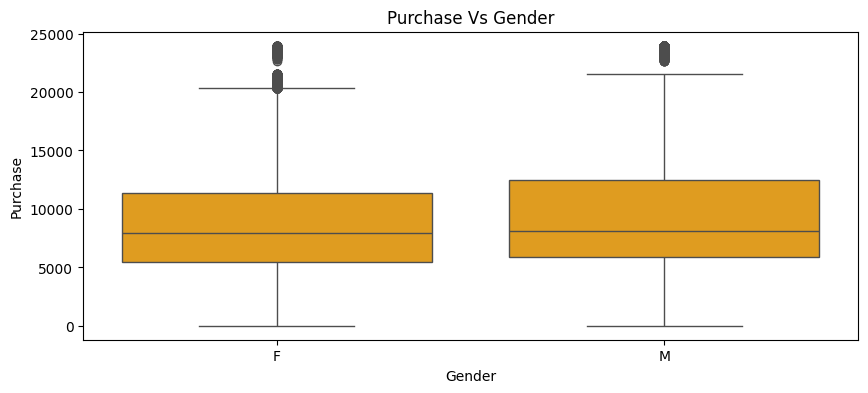

In [9]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, y='Purchase', x='Gender', color= 'orange')
plt.title('Purchase Vs Gender')
plt.show()

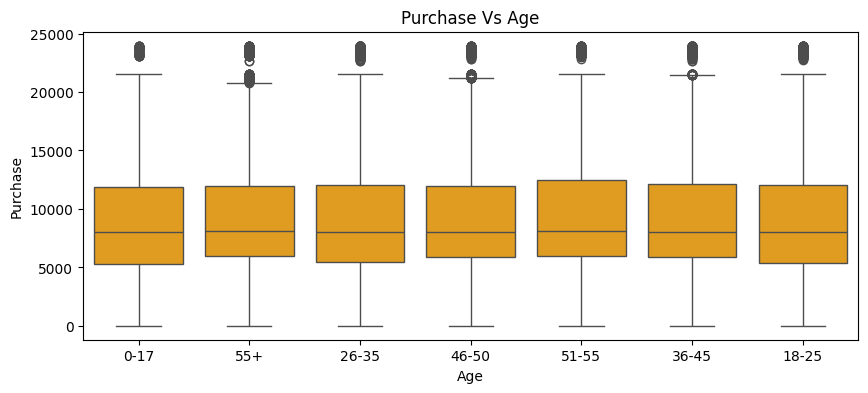

In [10]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, y='Purchase', x='Age', color= 'orange')
plt.title('Purchase Vs Age')
plt.show()

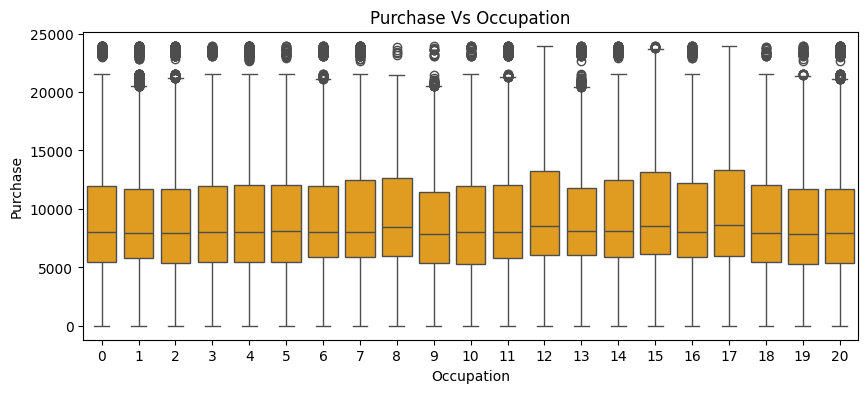

In [11]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, y='Purchase', x='Occupation', color= 'orange')
plt.title('Purchase Vs Occupation')
plt.show()

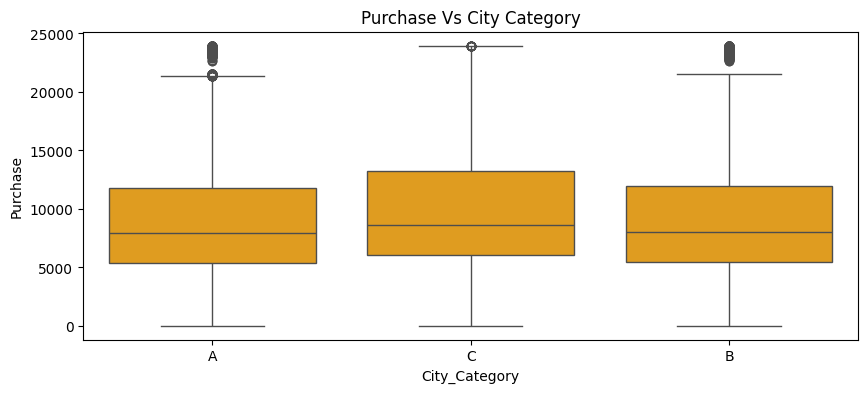

In [12]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, y='Purchase', x='City_Category', color= 'orange')
plt.title('Purchase Vs City Category')
plt.show()

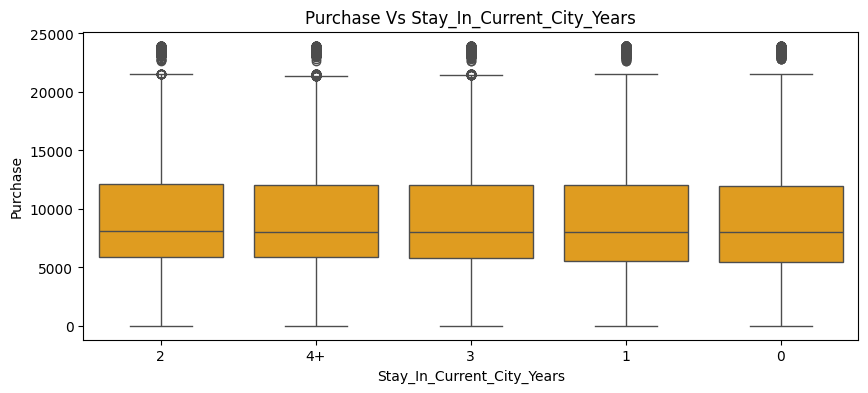

In [14]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, y='Purchase', x='Stay_In_Current_City_Years',color= 'orange')
plt.title(f'Purchase Vs Stay_In_Current_City_Years')
plt.show()

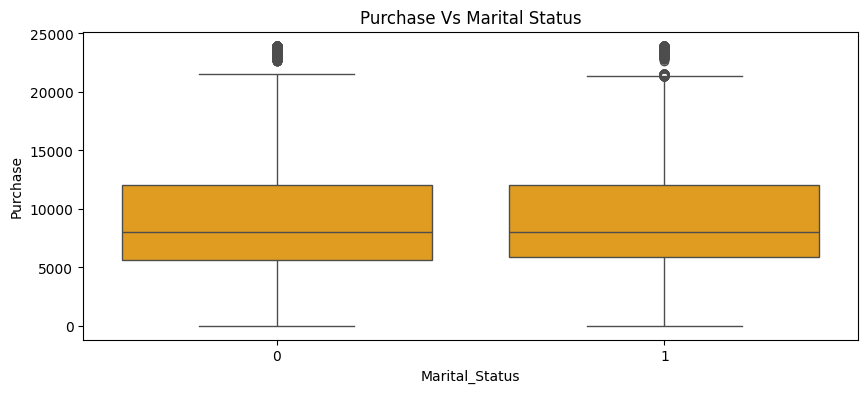

In [15]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, y='Purchase', x='Marital_Status', color= 'orange')
plt.title(f'Purchase Vs Marital Status')
plt.show()

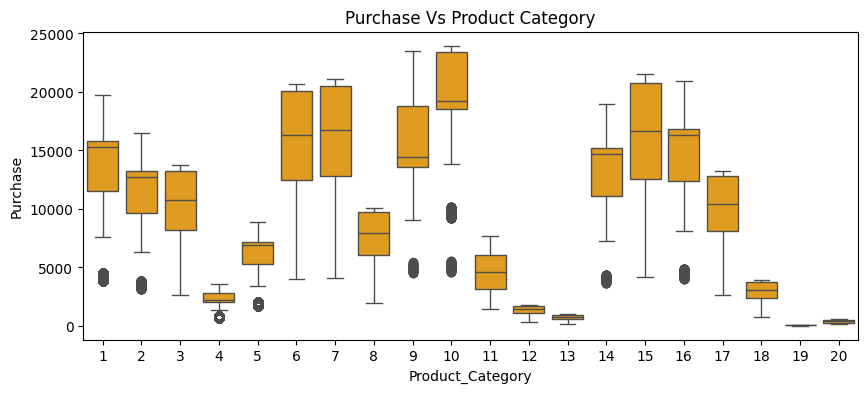

In [20]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, y='Purchase', x='Product_Category', color= 'orange')
plt.title(f'Purchase Vs Product Category')
plt.show()

## Multivariae Analysis

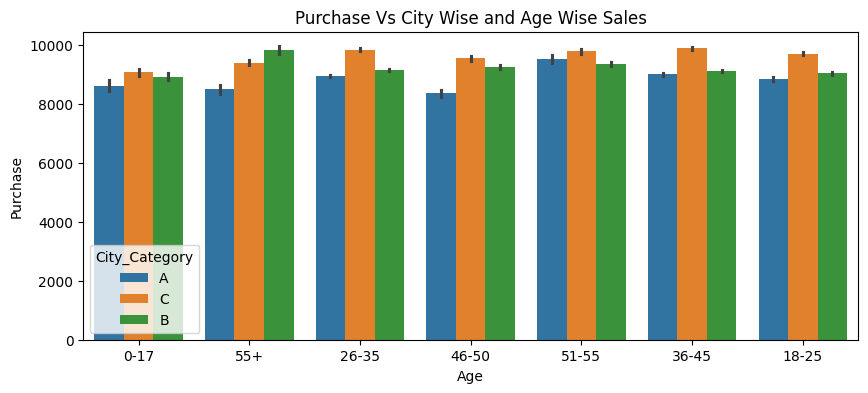

In [21]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df, y='Purchase', x='Age', hue = 'City_Category')
plt.title(f'Purchase Vs City Wise and Age Wise Sales')
plt.show()

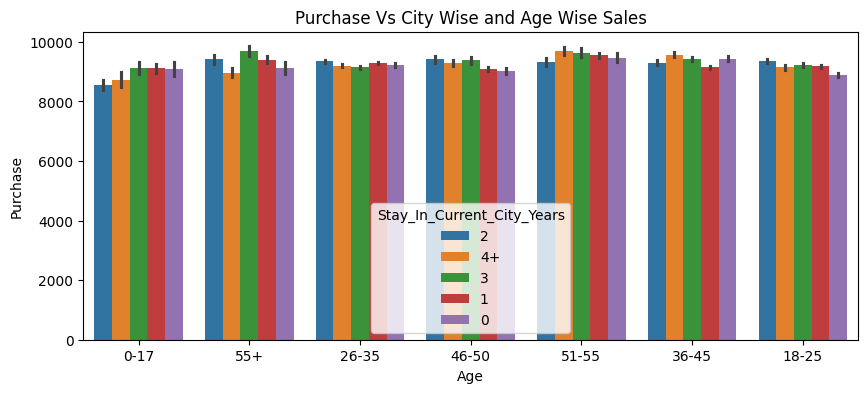

In [22]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df, y='Purchase', x='Age', hue = 'Stay_In_Current_City_Years')
plt.title(f'Purchase Vs City Wise and Age Wise Sales')
plt.show()

# Null values & Outlier Detection

In [23]:
# null values
null_values = df.isnull().sum()
print(f"Column wise null values :\n {null_values}")

# Detect outliers by comparing mean and median
mean_median_diff = df.describe().loc[['mean', '50%']]
print("Diff b/w Mean & Median:\n", mean_median_diff)

Column wise null values :
 User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64
Diff b/w Mean & Median:
            User_ID  Occupation  Marital_Status  Product_Category     Purchase
mean  1.003029e+06    8.076707        0.409653           5.40427  9263.968713
50%   1.003077e+06    7.000000        0.000000           5.00000  8047.000000


In [25]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [26]:
# Amount spent per by gender
female_spending = df[df['Gender'] == 'F']['Purchase']
male_spending = df[df['Gender'] == 'M']['Purchase']

# average spending
avg_female_spending = female_spending.mean().round(1)
avg_male_spending = male_spending.mean().round(1)

print(f"Average Spending by Females: {avg_female_spending}")
print(f"Average Spending by Males: {avg_male_spending}")

Average Spending by Females: 8734.6
Average Spending by Males: 9437.5


*Average spendng by males are higher than female

# CI Calculation Using CLT

In [30]:
# Func to calculate CI
def compute_confidence_interval(df, confidence=0.95):
    mean = np.mean(df)
    sem = stats.sem(df)
    interval = sem * stats.t.ppf((1 + confidence) / 2, len(df) - 1)
    return mean - interval, mean + interval


In [31]:
# CI for female customers
female_conf_interval = compute_confidence_interval(female_spending, confidence=0.99)
print(f"99% Confidence Interval for Female Spending: {female_conf_interval}")

female_conf_interval = compute_confidence_interval(female_spending, confidence=0.95)
print(f"95% Confidence Interval for Female Spending: {female_conf_interval}")

female_conf_interval = compute_confidence_interval(female_spending, confidence=0.90)
print(f"90% Confidence Interval for Female Spending: {female_conf_interval}")

# CI for male customers
male_conf_interval = compute_confidence_interval(male_spending, confidence=0.99)
print(f"99% Confidence Interval for Male Spending: {male_conf_interval}")

male_conf_interval = compute_confidence_interval(male_spending, confidence=0.95)
print(f"95% Confidence Interval for Male Spending: {male_conf_interval}")

male_conf_interval = compute_confidence_interval(male_spending, confidence=0.90)
print(f"90% Confidence Interval for Male Spending: {male_conf_interval}")

99% Confidence Interval for Female Spending: (8701.24420611832, 8767.887324192632)
95% Confidence Interval for Female Spending: (8709.21132117373, 8759.92020913722)
90% Confidence Interval for Female Spending: (8713.287689504074, 8755.843840806878)
99% Confidence Interval for Male Spending: (9417.14682877079, 9457.90525217374)
95% Confidence Interval for Male Spending: (9422.019402055814, 9453.032678888716)
90% Confidence Interval for Male Spending: (9424.512468203842, 9450.539612740688)


#Overlap in CI

In [32]:
overlap = not (female_conf_interval[1] < male_conf_interval[0] or male_conf_interval[1] < female_conf_interval[0])
print(f"Do the confidence intervals overlap? {'Yes' if overlap else 'No'}")

Do the confidence intervals overlap? No


# Analysis for Married vs. Unmarried and Age Groups

In [33]:
married_spending = df[df['Marital_Status'] == 1]['Purchase']
unmarried_spending = df[df['Marital_Status'] == 0]['Purchase']

In [34]:
# CI for married people:
married_conf_interval = compute_confidence_interval(married_spending, confidence=0.99)
print(f"99% CI for Married Spending: {married_conf_interval}")

married_conf_interval = compute_confidence_interval(married_spending, confidence=0.95)
print(f"95% CI for Married Spending: {married_conf_interval}")

married_conf_interval = compute_confidence_interval(married_spending, confidence=0.90)
print(f"90% CI for Married Spending: {married_conf_interval}")

# CI for unmarried people:

unmarried_conf_interval = compute_confidence_interval(unmarried_spending, confidence=0.99)
print(f"99% CI for Unmarried Spending: {unmarried_conf_interval}")

unmarried_conf_interval = compute_confidence_interval(unmarried_spending, confidence=0.95)
print(f"95% CI for Unmarried Spending: {unmarried_conf_interval}")

unmarried_conf_interval = compute_confidence_interval(unmarried_spending, confidence=0.90)
print(f"90% CI for Unmarried Spending: {unmarried_conf_interval}")

99% CI for Married Spending: (9233.951339733765, 9288.397808430982)
95% CI for Married Spending: (9240.460315792989, 9281.888832371758)
90% CI for Married Spending: (9243.79064243542, 9278.558505729326)
99% CI for Unmarried Spending: (9243.182995563593, 9288.63224227942)
95% CI for Unmarried Spending: (9248.616353737028, 9283.198884105985)
90% CI for Unmarried Spending: (9251.396344426079, 9280.418893416934)


## Age Analysis

In [35]:
Age_label = ['0-17', '18-25','26-35','36-45','46-50','51-55','55+']


print('99% Confidence Interval for the various Age groups: ')
for age_group in Age_label:
    age_spending = df[df['Age'] == age_group]['Purchase']
    age_conf_interval = compute_confidence_interval(age_spending, confidence=0.99)
    print(f"99% Confidence Interval for Age Group {age_group}: {age_conf_interval}")

print()

print('95% Confidence Interval for the various Age groups: ')
for age_group in Age_label:
    age_spending = df[df['Age'] == age_group]['Purchase']
    age_conf_interval = compute_confidence_interval(age_spending, confidence=0.95)
    print(f"95% Confidence Interval for Age Group {age_group}: {age_conf_interval}")

print()

print('90% Confidence Interval for the various Age groups: ')
for age_group in Age_label:
    age_spending = df[df['Age'] == age_group]['Purchase']
    age_conf_interval = compute_confidence_interval(age_spending, confidence=0.90)
    print(f"90% Confidence Interval for Age Group {age_group}: {age_conf_interval}")

99% Confidence Interval for the various Age groups: 
99% Confidence Interval for Age Group 0-17: (8826.320033768494, 9040.609247121454)
99% Confidence Interval for Age Group 18-25: (9128.585922624949, 9210.741289897629)
99% Confidence Interval for Age Group 26-35: (9225.148284007466, 9280.23298173231)
99% Confidence Interval for Age Group 36-45: (9292.34219880095, 9370.359191034797)
99% Confidence Interval for Age Group 46-50: (9148.772763375606, 9268.478631561049)
99% Confidence Interval for Age Group 51-55: (9468.020441793446, 9601.595620127026)
99% Confidence Interval for Age Group 55+: (9248.243867862855, 9424.317051035954)

95% Confidence Interval for the various Age groups: 
95% Confidence Interval for Age Group 0-17: (8851.941436361221, 9014.987844528727)
95% Confidence Interval for Age Group 18-25: (9138.40756914702, 9200.919643375557)
95% Confidence Interval for Age Group 26-35: (9231.733560884022, 9273.647704855754)
95% Confidence Interval for Age Group 36-45: (9301.669084404

# Observations:
1. The confidence intervals for male customers are higher than those for female customers.
2. The confidence intervals for male and female customers do not overlap, indicating a statistically significant difference in average spending.
3. The confidence intervals for married and unmarried customers are very close, indicating similar spending patterns.
4. The confidence intervals are generally higher for older age groups (18-25 and 26-35) compared to the younger group (0-17).

# Recommendations:

1. Targeted Marketing: Focus marketing efforts on male customers, who tend to have higher average spending than female customers. Consider age-targeted promotions, particularly for the 18-35 age group, which shows higher spending.

2. Product Bundling: Bundle products that appeal to higher-spending age groups, such as 18-35, to increase basket size.

3. Loyalty Programs: Introduce or enhance loyalty programs targeting married customers, whose spending patterns are similar to unmarried customers but could be encouraged to spend more through targeted offers.